<a href="https://colab.research.google.com/github/Jcunn10/Programming8410/blob/main/ProgrammingEDADeliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import statsmodels.formula.api as smf
#from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, LassoCV, BayesianRidge
#from sklearn.preprocessing import normalize, Normalizer, StandardScaler
#from sklearn import metrics, preprocessing
#from sklearn.model_selection  import train_test_split
#from scipy.stats import norm # for scientific Computing
#from scipy import stats, integrate
#import matplotlib.pyplot as plt

#%matplotlib inline
#from pathlib import Path
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
df=pd.read_csv(r"https://github.com/Jcunn10/Programming8410/raw/main/Data/Homeless.csv")
df.head(5)

,CLIENT_KEY,AGE,VETERAN,INCOME,NIGHTS,COMPLETED,PROBATION,SUBSTANCEABUSE,TEMPASSISTANCE,PERMASSISTANCE,age1
0,256172,20,No,0.0,152.0,N,Yes,No,Yes,Yes,YOUNG
1,221079,20,No,740.0,229.0,Y,No,No,Yes,Yes,YOUNG
2,243074,21,No,0.0,105.0,Y,No,Yes,Yes,Yes,YOUNG
3,129974,21,No,0.0,371.0,Y,No,Yes,Yes,Yes,YOUNG
4,226596,22,No,0.0,169.0,N,No,No,Yes,Yes,NaN


In [ ]:
df.shape

(121, 11)

In [ ]:
columns = list(df.columns)
print("Variables in the data are: ")
print(columns)

Variables in the data are: 
['CLIENT_KEY', 'AGE', 'VETERAN', 'INCOME', 'NIGHTS', 'COMPLETED', 'PROBATION', 'SUBSTANCEABUSE', 'TEMPASSISTANCE', 'PERMASSISTANCE', 'age1']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      121 non-null    int64  
 1   AGE             121 non-null    int64  
 2   VETERAN         121 non-null    object 
 3   INCOME          121 non-null    float64
 4   NIGHTS          118 non-null    float64
 5   COMPLETED       121 non-null    object 
 6   PROBATION       121 non-null    object 
 7   SUBSTANCEABUSE  121 non-null    object 
 8   TEMPASSISTANCE  72 non-null     object 
 9   PERMASSISTANCE  121 non-null    object 
 10  age1            116 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 10.5+ KB


In [ ]:
#Get unique values in each of the Objects
df['SUBSTANCEABUSE'].unique()

array(['No', 'Yes', 'YES', 'Pot'], dtype=object)

In [ ]:
#Checking for NaNs
value = df.isnull().values.any()
print(value)

True


In [ ]:
value = df['NIGHTS'].isna().sum()
print(value)

3


In [ ]:
df2 = df["NIGHTS"].median()
print (df2)

90.0


In [ ]:
df3 = df["NIGHTS"].mean()
print (df3)

105.0677966101695


In [ ]:
dfNum=df[["AGE","NIGHTS","INCOME"]]
dfCat=df[['CLIENT_KEY', 'VETERAN', 'COMPLETED', 'PROBATION', 'SUBSTANCEABUSE', 'TEMPASSISTANCE', 'PERMASSISTANCE', 'age1']]
dfNum.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,121.0,41.438017,15.671042,20.0,30.0,38.0,49.0,98.00
NIGHTS,118.0,105.067797,98.891612,1.0,45.0,90.0,104.5,524.00
INCOME,121.0,992.128182,4761.297192,0.0,0.0,571.0,906.0,52583.34


In [ ]:
dfCat.astype('category').describe().T

,count,unique,top,freq
CLIENT_KEY,121,115,213114,3
VETERAN,121,2,No,95
COMPLETED,121,3,Y,98
PROBATION,121,3,No,86
SUBSTANCEABUSE,121,4,No,81
TEMPASSISTANCE,72,2,Yes,68
PERMASSISTANCE,121,2,No,67
age1,116,4,ADULT,46


In [ ]:
df2 = pd.concat([dfNum, dfCat], axis=1)

print(df2)

     AGE  NIGHTS   INCOME  CLIENT_KEY VETERAN COMPLETED PROBATION  \
0     20   152.0     0.00      256172      No         N       Yes   
1     20   229.0   740.00      221079      No         Y        No   
2     21   105.0     0.00      243074      No         Y        No   
3     21   371.0     0.00      129974      No         Y        No   
4     22   169.0     0.00      226596      No         N        No   
..   ...     ...      ...         ...     ...       ...       ...   
116   77    12.0     0.00      204806     Yes         Y        No   
117   77    25.0  1331.02      320878     Yes         Y        No   
118   79    11.0  2100.00      213114     Yes         Y        No   
119   79    16.0   694.00      258969     Yes         Y        No   
120   79    22.0     0.00       84396     Yes         Y        No   

    SUBSTANCEABUSE TEMPASSISTANCE PERMASSISTANCE     age1  
0               No            Yes            Yes    YOUNG  
1               No            Yes            Yes   

In [ ]:
# #Get unique values in each of the Objects
# #unique = df.unique()
print(df['VETERAN'].unique())
print(df['COMPLETED'].unique())
print(df['PROBATION'].unique())
print(df['TEMPASSISTANCE'].unique())
print(df['PERMASSISTANCE'].unique())
print(df['age1'].unique())


['No' 'Yes']
['N' 'Y' '100']
['Yes' 'No' 'N']
['Yes' nan 'No']
['Yes' 'No']
['YOUNG' nan 'ADULT' 'SENIOR' 'RETIRED']


In [ ]:
df2['COMPLETED'] = df2['COMPLETED'].str.replace('N', 'No')
df2['COMPLETED'] = df2['COMPLETED'].str.replace('Y', 'Yes')
df2['COMPLETED'] = df2['COMPLETED'].str.replace('100', 'Yes')
df2['COMPLETED'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df2['PROBATION'] = df2['PROBATION'].str.replace('No', 'N')
df2['PROBATION'] = df2['PROBATION'].str.replace('N', 'No')
df2['PROBATION'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df2['SUBSTANCEABUSE'] = df2['SUBSTANCEABUSE'].str.replace('YES', 'Yes')
df2['SUBSTANCEABUSE'] = df2['SUBSTANCEABUSE'].str.replace('Pot', 'Yes')
df2['SUBSTANCEABUSE'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df2[['NIGHTS']] = df2[['NIGHTS']].fillna(df2[['NIGHTS']].median())
value = df2["NIGHTS"].isnull().values.any()
print(value)

False


In [ ]:
def fill_missing_values(df, age_col, cat_col):
    """
    Fills missing values in a categorical column using a numerical age column.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    age_col (str): The name of the numerical age column.
    cat_col (str): The name of the categorical column with missing values.

    Returns:
    pd.DataFrame: The dataframe with missing values filled.
    """

    # Define the age bins
    bins = [18, 30, 40, 60, np.inf]
    labels = ['YOUNG', 'ADULT', 'SENIOR', 'RETIRED']

    # Create a new column with age categories
    df[cat_col] = pd.cut(df[age_col], bins=bins, labels=labels)

    # Calculate the median age for each category
    median_ages = df.groupby(cat_col)[age_col].median()

    # Fill missing values in each category with the median age of that category
    for cat in df[cat_col].unique():
        df.loc[(df[cat_col] == cat) & (df[age_col].isnull()), age_col] = median_ages[cat]

    return df
fill_missing_values(df2, "AGE", "age1" )

,AGE,NIGHTS,INCOME,CLIENT_KEY,VETERAN,COMPLETED,PROBATION,SUBSTANCEABUSE,TEMPASSISTANCE,PERMASSISTANCE,age1
0,20,152.0,0.00,256172,No,No,Yes,No,Yes,Yes,YOUNG
1,20,229.0,740.00,221079,No,Yes,No,No,Yes,Yes,YOUNG
2,21,105.0,0.00,243074,No,Yes,No,Yes,Yes,Yes,YOUNG
3,21,371.0,0.00,129974,No,Yes,No,Yes,Yes,Yes,YOUNG
4,22,169.0,0.00,226596,No,No,No,No,Yes,Yes,YOUNG
...,...,...,...,...,...,...,...,...,...,...,...
116,77,12.0,0.00,204806,Yes,Yes,No,No,Yes,No,RETIRED
117,77,25.0,1331.02,320878,Yes,Yes,No,No,Yes,No,RETIRED
118,79,11.0,2100.00,213114,Yes,Yes,No,No,Yes,No,RETIRED
119,79,16.0,694.00,258969,Yes,Yes,No,No,No,No,RETIRED


In [ ]:

def detect_outliers(df):
    import pandas as pd
    outlier_counts = {}
    outlier_values = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            outlier_counts[col] = outliers.count()
            outlier_values[col] = outliers.values.tolist()

    return outlier_counts, outlier_values

outlier_counts, outlier_values = detect_outliers(dfNum)

print("Outlier Counts:")
for variable, count in outlier_counts.items():
    print(f"{variable}: {count}")

print("\nOutlier Values:")
for variable, values in outlier_values.items():
    print(f"{variable}: {values}")

Outlier Counts:
AGE: 4
NIGHTS: 12
INCOME: 2

Outlier Values:
AGE: [98, 79, 79, 79]
NIGHTS: [229.0, 371.0, 297.0, 477.0, 477.0, 524.0, 275.0, 270.0, 237.0, 256.0, 401.0, 418.0]
INCOME: [52583.34, 2974.0]


In [ ]:
df2['age1'].unique

<bound method Series.unique of 0        YOUNG
1        YOUNG
2        YOUNG
3        YOUNG
4        YOUNG
        ...   
116    RETIRED
117    RETIRED
118    RETIRED
119    RETIRED
120    RETIRED
Name: age1, Length: 121, dtype: category
Categories (4, object): ['YOUNG' < 'ADULT' < 'SENIOR' < 'RETIRED']>

In [ ]:
value = df2.isnull().values.any()
print(value)

True


In [ ]:
dfdropped=df2.drop("TEMPASSISTANCE", axis=1)
dfdropped

,AGE,NIGHTS,INCOME,CLIENT_KEY,VETERAN,COMPLETED,PROBATION,SUBSTANCEABUSE,PERMASSISTANCE,age1
0,20,152.0,0.00,256172,No,No,Yes,No,Yes,YOUNG
1,20,229.0,740.00,221079,No,Yes,No,No,Yes,YOUNG
2,21,105.0,0.00,243074,No,Yes,No,Yes,Yes,YOUNG
3,21,371.0,0.00,129974,No,Yes,No,Yes,Yes,YOUNG
4,22,169.0,0.00,226596,No,No,No,No,Yes,YOUNG
...,...,...,...,...,...,...,...,...,...,...
116,77,12.0,0.00,204806,Yes,Yes,No,No,No,RETIRED
117,77,25.0,1331.02,320878,Yes,Yes,No,No,No,RETIRED
118,79,11.0,2100.00,213114,Yes,Yes,No,No,No,RETIRED
119,79,16.0,694.00,258969,Yes,Yes,No,No,No,RETIRED


In [ ]:
value = dfdropped.isnull().values.any()
print(value)

False


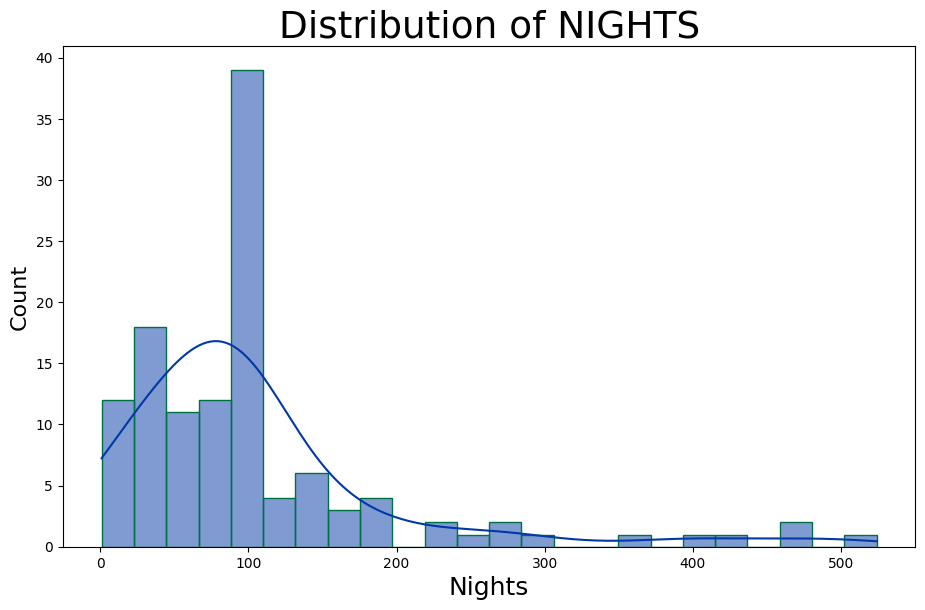

In [ ]:
plt.figure(figsize=(11,6.5))
sns.histplot(data=df2, x='NIGHTS', color=(0.0, 0.2235, 0.6510), edgecolor=(0.0, 0.4353, 0.2588), kde=True)
plt.title('Distribution of NIGHTS', fontdict={"fontsize": 27})
plt.xlabel('Nights', fontsize=18)
plt.ylabel('Count', fontsize=16)
#plt.savefig('NightsHist.png')
plt.show()

In [ ]:
filtered_df = df[(df['INCOME'] < 2900) & (df['NIGHTS'] < 229)]

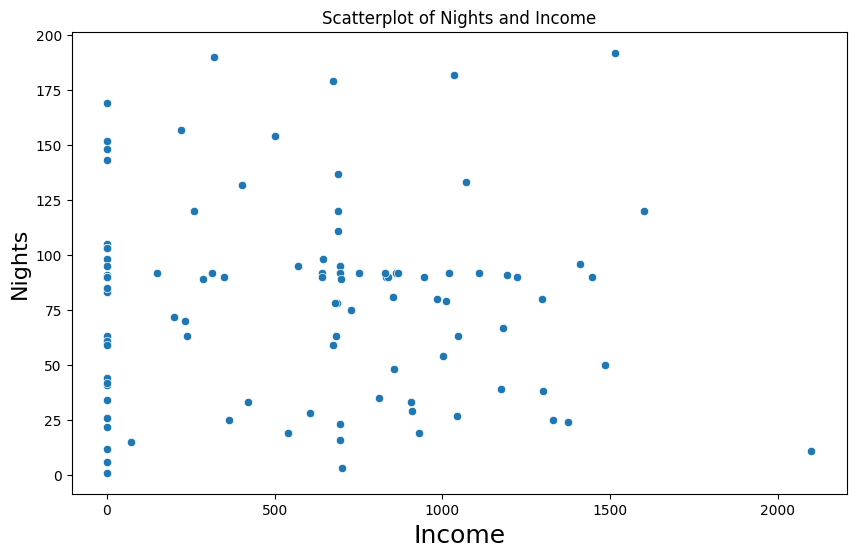

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="INCOME", y="NIGHTS", data=filtered_df)
plt.title('Scatterplot of Nights and Income')
plt.xlabel('Income', fontsize=18)
plt.ylabel('Nights', fontsize=16)
#plt.savefig('SPNightsIncome.png')
plt.show()

In [ ]:
correlation = filtered_df['INCOME'].corr(filtered_df['NIGHTS'])

print(correlation)

-0.0031558352630511152


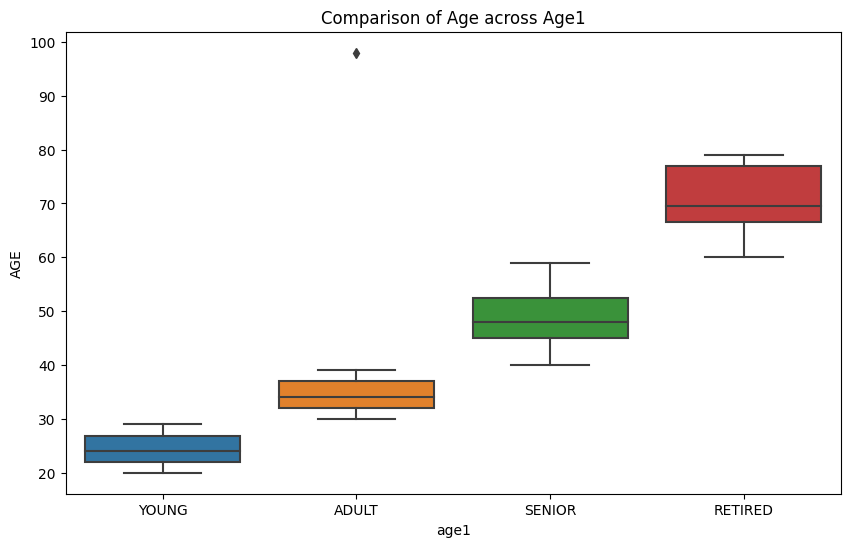

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="age1", y="AGE", data=df)
plt.title('Comparison of Age across Age1')
#plt.savefig('BPAgeAge1.png')
plt.show()

In [ ]:
df[['TEMPASSISTANCE']] = df[['TEMPASSISTANCE']].fillna("(MISSING)")
value = df["TEMPASSISTANCE"].isnull().values.any()
print(value)

False


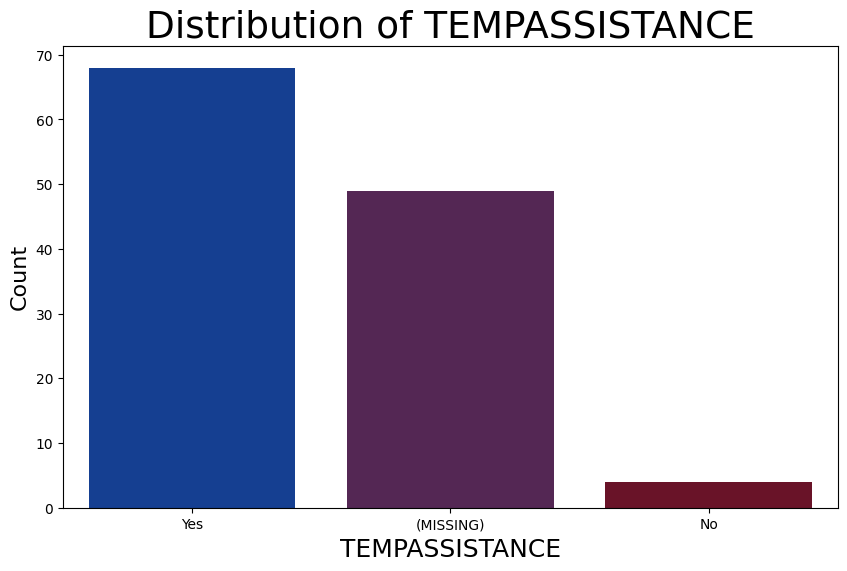

In [ ]:
plt.figure(figsize=(10,6))
palette = {"Yes": (0.0, 0.2235, 0.6510), "(MISSING)": (0.3569, 0.1216, 0.3569), "No": (0.4667, 0.0196, 0.1255)}
sns.countplot(data=df, x="TEMPASSISTANCE", palette= palette)
plt.title('Distribution of TEMPASISSTANCE')
plt.title('Distribution of TEMPASSISTANCE', fontdict={"fontsize": 27})
plt.xlabel('TEMPASSISTANCE', fontsize=18)
plt.ylabel('Count', fontsize=16)
#plt.savefig('CountTempassistance.png')
plt.show()